
# Univariate Analysis – Complete Notebook (Numerical & Categorical)

**Goal:**  
Learn how to *systematically* think about univariate analysis using a real dataset.

We will cover:
- What univariate analysis means
- Numerical vs categorical variables
- X-axis and Y-axis reasoning
- Purpose-driven visualization

---



## 1. Dataset Creation

We create a **synthetic dataset (200 rows)** to simulate a real-world scenario.

**Columns:**
- `Age` (numerical)
- `Salary` (numerical)
- `ExamScore` (numerical)
- `Department` (categorical)
- `Gender` (categorical)


In [2]:

import numpy as np
import pandas as pd

np.random.seed(42)

n = 200

data = pd.DataFrame({
    "Age": np.random.normal(25, 4, n).astype(int),
    "Salary": np.random.normal(50000, 12000, n),
    "ExamScore": np.random.normal(70, 10, n),
    "Department": np.random.choice(["CSE", "ECE", "ME", "CE"], n),
    "Gender": np.random.choice(["Male", "Female"], n)
})

data.head()


,Age,Salary,ExamScore,Department,Gender
0,26,54293.448324,54.055723,ME,Female
1,24,56729.414316,64.006250,CE,Male
2,27,62996.614918,70.052437,CE,Male
3,31,62645.624624,70.469806,CSE,Female
4,24,33467.967585,65.499345,ECE,Male



## 2. Univariate Analysis – Numerical Data

### Core Rule
- **X-axis:** the column itself
- **Y-axis:** a function of the same column (count, density, quartiles, etc.)

---



### 2.1 Histogram (Frequency-based)

**Purpose:**  
Understand distribution and frequency.

**Y-axis meaning:** Count of values in bins


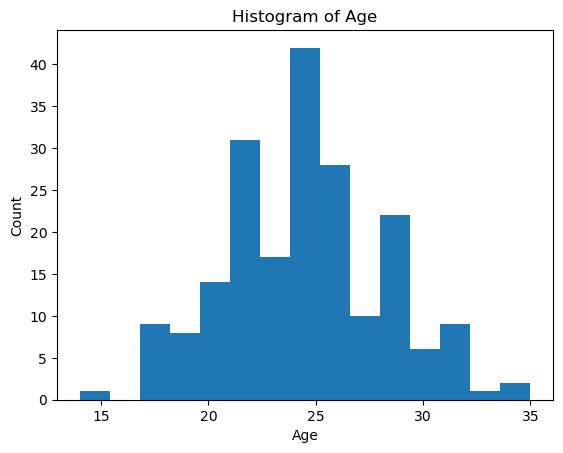

In [3]:

import matplotlib.pyplot as plt

# plt.figure()
plt.hist(data["Age"], bins=15)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram of Age")
plt.show()



### 2.2 Histogram (Density)

**Y-axis meaning:** Probability density  
Area under curve = 1


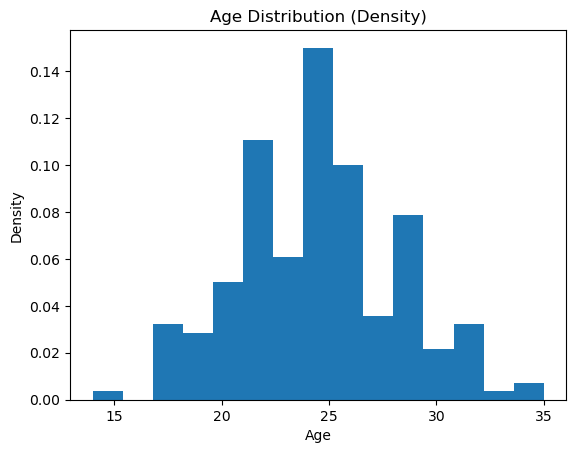

In [4]:

plt.figure()
plt.hist(data["Age"], bins=15, density=True)
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution (Density)")
plt.show()



### 2.3 KDE Plot (Shape Estimation)

**Purpose:**  
Smooth estimate of the underlying distribution.


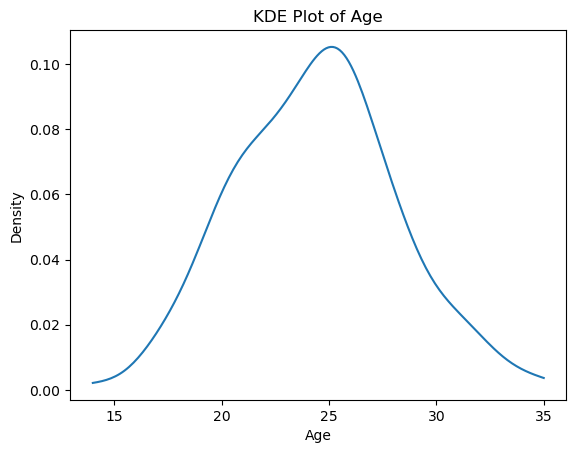

In [5]:

from scipy.stats import gaussian_kde, kde


x = np.linspace(data["Age"].min(), data["Age"].max(), 200)
kde = gaussian_kde(data["Age"])

plt.figure()
plt.plot(x, kde(x))
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("KDE Plot of Age")
plt.show()


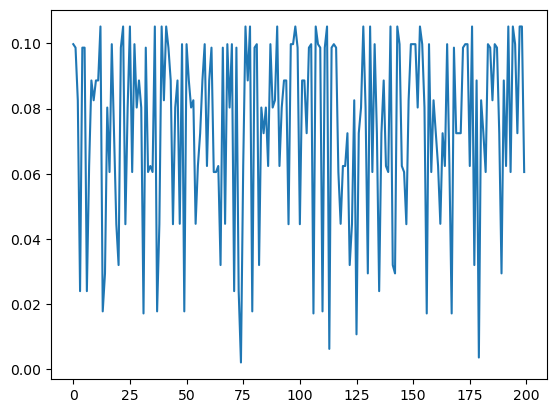

In [6]:
kde2 = kde(data["Age"])
plt.plot(kde2)
plt.show()


### 2.4 Box Plot (Spread & Outliers)

**Y-axis meaning:** Quartiles and median (order statistics)


Text(0.5, 1.0, 'Box Plot of Salary')

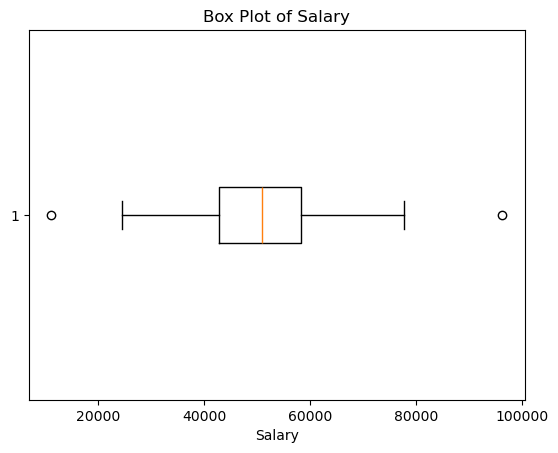

In [ ]:

# plt.show()
plt.figure()
plt.boxplot(data["Salary"], vert=False)
plt.xlabel("Salary")
plt.title("Box Plot of Salary")
# plt.show()



### 2.5 ECDF (Cumulative View)

**Purpose:**  
What fraction of data lies below a value?


In [ ]:

sorted_scores = np.sort(data["ExamScore"])
ecdf = np.arange(1, len(sorted_scores) + 1) / len(sorted_scores)

plt.figure()
plt.plot(sorted_scores, ecdf)
plt.xlabel("Exam Score")
plt.ylabel("Cumulative Probability")
plt.title("ECDF of Exam Scores")
plt.show()



## 3. Univariate Analysis – Categorical Data

### Core Rule
- Categories have **no magnitude**
- Only **counts and proportions** make sense



### 3.1 Bar Chart (Counts)

**Y-axis meaning:** Number of observations per category


In [ ]:

dept_counts = data["Department"].value_counts()

plt.figure()
plt.bar(dept_counts.index, dept_counts.values)
plt.xlabel("Department")
plt.ylabel("Count")
plt.title("Department Distribution")
plt.show()



### 3.2 Bar Chart (Proportions)

**Y-axis meaning:** Percentage share


In [ ]:

dept_prop = dept_counts / dept_counts.sum()

plt.figure()
plt.bar(dept_prop.index, dept_prop.values)
plt.xlabel("Department")
plt.ylabel("Proportion")
plt.title("Department Proportion")
plt.show()



### 3.3 Ordered Bar Chart (Dominance)

**Purpose:**  
Ranking categories by frequency


In [ ]:

plt.figure()
dept_counts.sort_values().plot(kind="barh")
plt.xlabel("Count")
plt.title("Ordered Department Frequency")
plt.show()



## 4. Final Mental Framework (Summary)

### Step-by-Step Thinking Tool

1. Identify variable type → Numerical / Categorical  
2. Decide intent → Distribution / Spread / Proportion  
3. Choose Y-axis operation → Count / Density / Quartile  
4. Select plot → Histogram / Box / Bar  

> **Univariate plots do not compare — they characterize**
